# 1. Bessel Functions

These appear in various physics problems, and are given by:
$$J_m(x) = \frac{1}{\pi} \int_0^\pi \cos(m \theta - x \sin \theta) d\theta $$
where $m$ is a whole number and $x$ is a non-negative real number.

## Part (a) 

Write pseudocode for your own Python function that calculates the value of the Bessel function
$J_m(x)$, taking $m$ and $x$ as inputs, using Gaussian Quadrature with $N$ points. $N$ is a parameter that you set in your code. You can use the gaussxw and gaussxwab functions from the previous lab exercises.

1. set the appropriate N
2. use gaussxwab and  get quadrature points over [0,pi]
3. start with placeholder sum 
4. loop over quadrature points with function and update sum 
5. find Jm(x) and output value

## Part (b)
Now write the actual code.

In [29]:
import numpy as np

In [30]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [31]:
def function (deg, a, x):
    return np.cos (deg*a - x*np.sin(a))/np.pi

In [32]:
Ngauss = 20
def J(m,x):
    def t_integrand(t):
        return function(m,t,x)
    xgauss, wgauss = gaussxwab (Ngauss, 0., np.pi)
    I=0
    for k in range (Ngauss):
        I += wgauss [k]*t_integrand(xgauss[k])
    return I
m=2
x=5
print(J(m,x))

0.04656511627751303


## Part (c)
Use the code from the previous part  to make a plot, on a single graph, of the Bessel
functions $J_0, J_1, J_2$ as a function of $x$ from $x = 0$ to $x = 20$.

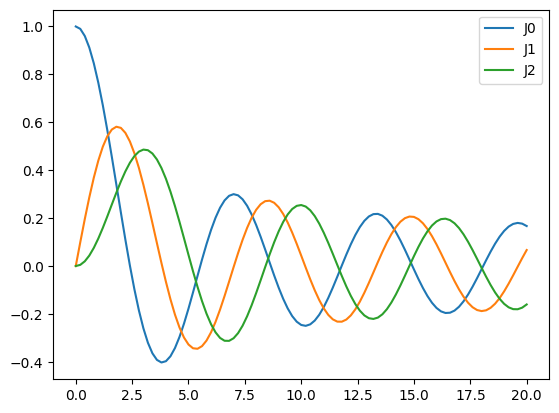

In [33]:
import matplotlib.pyplot as plt
x = np.linspace(0,20,101)
plt.plot(x,J(0,x), label = 'J0')
plt.plot(x,J(1,x), label = 'J1')
plt.plot(x,J(2,x), label = 'J2')
plt.legend()

## Part (d)
scipy.special includes some special functions that are a little too exotic to be part of NumPy. One of such special function is the Bessel function, called jv . Compare graphically the difference between the results of your Bessel function from the previous part, and the results of the SciPy version.

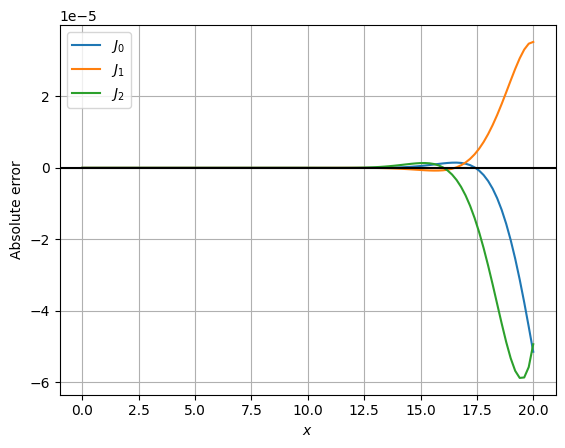

In [34]:
from scipy.special import jv
plt.figure()
for mm in range (3): # overkill?
    to_plot = (J (mm, x) - jv (mm, x))
    plt.plot(x, to_plot, label='$J_{}$'.format (mm)) 
plt.grid()
plt.xlabel('$x$')
plt.ylabel('Absolute error')
plt.axhline(0., color='k') # marks the y
plt.legend()

# 2. Black Body Radiation

The black body function can be written as a function of wavenumber $\nu$ and temperature $T$, using the Planck constant $h$, the speed of light $c$ and the Boltzmann constant $k$:
$$B = \frac{2h\nu^3}{c^2(\exp{\frac{h\nu}{kT}}-1)}$$
The total energy per unit area emitted by a black body is then:
$$W = \pi\int_0^\infty B d\nu $$
It follows Stefan's law:
$W = \sigma T^4$,
where $\sigma$ is the Stefan-Boltzmann constant. Therefore
$$\sigma = \frac{\pi\int_0^\infty B d\nu}{T^4} $$
(Of course, you remember all this if I was your prof for PHY252.)

Equivalently, using the change of variables $x = \frac{h \nu}{kT}$:
$$\sigma = C_1 \int_0^\infty\frac{x^3}{e^x-1} dx$$
with $C_1 = \frac{2 \pi k^4}{c^2 h^3}$

We can convert the limits of integration to [0,1] by another variable transform
$ z = \frac{x}{1+x}$:
$$\int_0^\infty f(x)dx = \int_0^1 \frac{1}{(1-z)^2}f\left(\frac{z}{1-z}\right)dz = \int_0^1 g(z) dz$$
We want to perform a numerical integral over the domain [0,1] in order to calculate $\sigma$. 

## Part (a)
Write code for the functions x(z), f(x), and g(z). 

In [43]:
import numpy as np

def x(z):
    return z/(1-z)

def f(x):
    return (x**3) / (np.exp(x) - 1)

def g(z):
    return (1 / (1 - z)**2) * f(x(z))

## Part (b)
Incorporating your functions from the previous part, write code to calculate $$\int_0^\infty\frac{x^3}{e^x-1} dx$$ using Gaussian quadrature. Figure out for yourself what value of $N$ you need, to obtain an accuracy of about 5 digits.

In [44]:
def compute_integral(N):
    z, w = gaussxwab(N, 0, 1)  # Get quadrature points and weights in [0,1]
    integral = 0.0
    for i in range(N):
        integral += w[i] * g(z[i])
    return integral

# Testing the integral with increasing N
for N in range(10, 51, 10):  # Try different N values for accuracy
    result = compute_integral(N)
    print(f"For N = {N}, Integral ≈ {result:.5f}")


N_final = 40  

For N = 10, Integral ≈ 6.57214
For N = 20, Integral ≈ 6.49324
For N = 30, Integral ≈ 6.49395
For N = 40, Integral ≈ 6.49394
For N = 50, Integral ≈ 6.49394


/var/folders/xh/7gk8znks2_1c4rm65wc62_s00000gn/T/ipykernel_45909/342678298.py:7: RuntimeWarning: overflow encountered in exp
  return (x**3) / (np.exp(x) - 1)


## Part (c)
Using the code from the previous part, calculate a value for the Stefan-Boltzmann constant in SI units, to three significant figures or more. Compare it to the value from NIST that is included in the scipy.constants package (https://docs.scipy.org/doc/scipy/reference/constants.html)

In [45]:
from scipy.constants import Stefan_Boltzmann, Boltzmann,speed_of_light,hbar
C1 = Boltzmann**4 / (4*np.pi**2 * speed_of_light**2 * hbar**3)
I = compute_integral(N_final)
print("My value for Stefan-Boltzmann = ", C1 * I)
print("Scipy value for Stefan-Boltzmann = ", Stefan_Boltzmann)

My value for Stefan-Boltzmann =  5.670374299776201e-08
Scipy value for Stefan-Boltzmann =  5.670374419e-08


/var/folders/xh/7gk8znks2_1c4rm65wc62_s00000gn/T/ipykernel_45909/342678298.py:7: RuntimeWarning: overflow encountered in exp
  return (x**3) / (np.exp(x) - 1)


Note, the Scipy value is taken from the NIST database, and includes an uncertainty in the measurement, so it is the currently accepted value. Our integral doesn't need to be machine precision level because the actual constant is only known to 8 digits.

# Fun with interpolation

Here, I perform interpolation for the function $$y = \frac{1}{2+x^2}$$

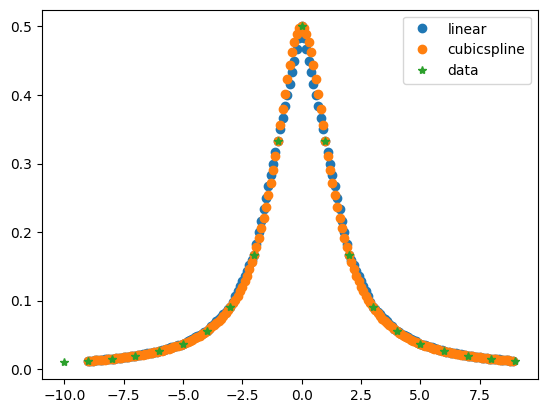

In [49]:
from scipy.interpolate import CubicSpline, interp1d
import matplotlib.pyplot as pltm

# fake data to interpolate from
x = np.arange(-10,10)
y = 1./(2.+x**2)

# points at which we want to interpolate
xs = np.arange(-9, 9, 0.1)

# Apply Linear interpolation
linear_int = interp1d(x,y)
ys_lin = linear_int(xs)

# apply cubic spline
cs = CubicSpline(x, y)
ys_cub = cs(xs)
  
# plot linear interpolation
pltm.plot(xs, ys_lin, 'o', label='linear')
pltm.plot(xs, ys_cub, 'o', label='cubicspline')
pltm.plot(x, y, '*', label='data')
pltm.legend()
pltm.show()

## Exercise 6

Replace the definition of y in the code above, to interpolate the following function:
$$y = \frac{1}{1+(2x)^2}$$

In [50]:
y = 1./(1.+(2. * x)**2.)

Show the plot. Is the cubic spline still nicer than the linear interpolation?

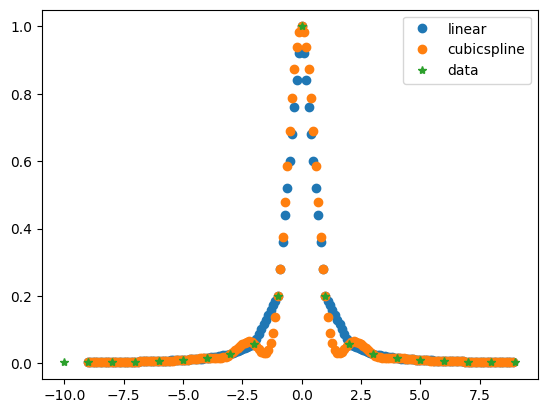

In [51]:
# points at which we want to interpolate
xs = np.arange(-9, 9, 0.1)

# Apply Linear interpolation
linear_int = interp1d(x,y)
ys_lin = linear_int(xs)

# apply cubic spline
cs = CubicSpline(x, y)
ys_cub = cs(xs)
  
# plot linear interpolation
pltm.plot(xs, ys_lin, 'o', label='linear')
pltm.plot(xs, ys_cub, 'o', label='cubicspline')
pltm.plot(x, y, '*', label='data')
pltm.legend()
pltm.show()